In [19]:
#Laboratorio 8 importar librerias
import numpy as np
import matplotlib.pyplot as plt
import cv2

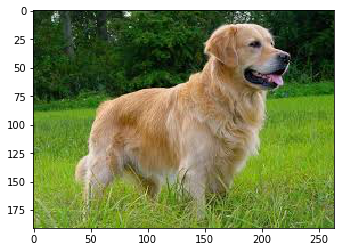

In [2]:
#Abrir imagenes
def Capturar_Imagen(pic):
    pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
    plt.imshow(pic)
    return pic

#Imagen 1
pic1 = cv2.imread('Imagenes/Lab8/perro_CG.jpeg')
type(pic1)
img1 = Capturar_Imagen(pic1)

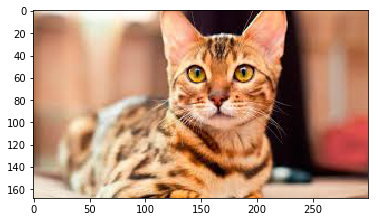

In [3]:
#Imagen 2
pic2 = cv2.imread('Imagenes/Lab8/gato_CG.jpeg')
type(pic2)
img2 = Capturar_Imagen(pic2)

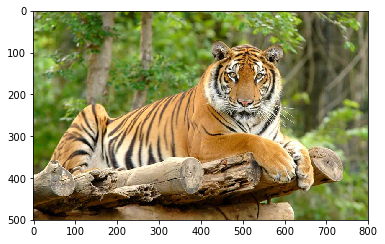

In [4]:
#Imagen 3
pic3 = cv2.imread('Imagenes/Lab8/Tigre_CG.jpg')
type(pic3)
img3 = Capturar_Imagen(pic3)

In [9]:
###Ejercicio 1: Redimensionar Arreglos
 #Determinar cual tiene mayor longitud

if img1.shape[0]>img2.shape[0] and img1.shape[1]>img2.shape[1]:
    img_max = img1
else:
    img_max = img2
if img_max.shape[0]>img3.shape[0] and img_max.shape[1]>img3.shape[1]:
    img_max = img_max
else:
    img_max = img3
 #Esta imagen tiene mayor resolución
img_max.shape
 #
img1 = cv2.resize(img1,(img_max.shape[0],img_max.shape[1]))
img2 = cv2.resize(img2,(img_max.shape[0],img_max.shape[1]))
img3 = cv2.resize(img3,(img_max.shape[0],img_max.shape[1]))


In [10]:
img1.shape

(500, 800, 3)

In [11]:
img2.shape

(500, 800, 3)

In [12]:
img3.shape

(500, 800, 3)

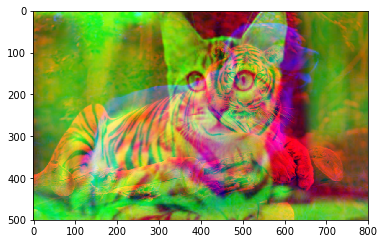

In [13]:
###Ejercicio2: Crear nueva imagen con canales de color combinados
rojo = img1[:, :, 2]  
verde = img2[:, :, 1]  
azul = img3[:, :, 0]  

# Combinar canales
img_cmb = cv2.merge([azul, verde, rojo])
plt.imshow(img_cmb)

True

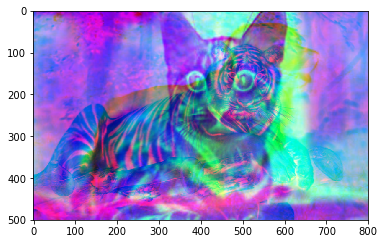

In [14]:
###Ejercicio3: Conversión a negativo y a escala de grises
    # Convertir la imagen a negativa
img_neg = cv2.bitwise_not(img_cmb)
plt.imshow(img_neg)
    #Guardar Imagen
cv2.imwrite('imagen_negativa.png', img_neg)

True

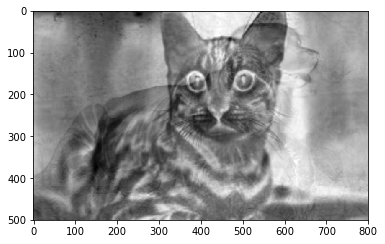

In [45]:
    #Convertir la imagen a escala de grises
img_gray = cv2.imread('Imagenes/Lab8/imagen_negativa.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(img_gray, cmap = 'gray')
    #Guardar la imagen a escala de grises
cv2.imwrite('imagen_grises.png', img_gray)

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
### Ejercicio 4: Aplicación interactiva de visualización de canales de color
img = cv2.imread('Imagenes/Lab8/imagen_negativa.png')
type(img)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.bitwise_not(img)

# Se crean canales
canales = {'b': True, 'g': True, 'r': True}

# Mapeo para teclas y canales
teclas = {'b': 0, 'g': 1, 'r': 2}

# Bucle principal
while True:
    # Crear copia de la imagen original
    img_mod = img.copy()

    # Desactivar canales según estado
    for canal, activo in canales.items():
        if not activo:
            img_mod[:, :, teclas[canal]] = 0

    # Mostrar imagen
    cv2.imshow('Visualizar Canales (Presiona r/g/b para ocultar y mostrar, q para salir)', img_mod)

    # Esperar tecla
    key = cv2.waitKey(100)

    if key == ord('q'):
        break
    elif key in [ord('r'), ord('g'), ord('b')]:
        k = chr(key)
        canales[k] = not canales[k]  # Alternar estado del canal

cv2.destroyAllWindows()

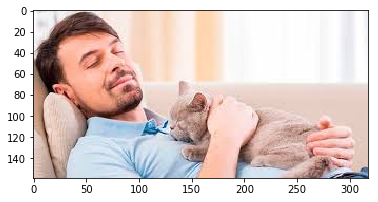

In [17]:
### Ejercicio 5: Dibujo de figuras y texto en imágenes
img_exp = cv2.imread('Imagenes/Lab8/persona_gato.jpeg')
type(img_exp)
img_exp = cv2.cvtColor(img_exp,cv2.COLOR_BGR2RGB)
plt.imshow(img_exp)
#Persona y Gato

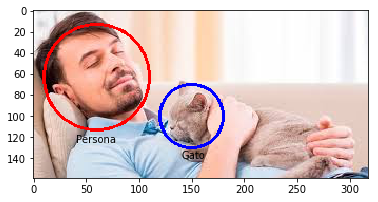

In [35]:
red_circle_people = cv2.circle(img_exp,(60,63), 50, (255,0,0), 2)
blue_cricle_cat = cv2.circle(img_exp,(150,100), 30, (0,0,255), 2)
plt.text(40, 125, "Persona")
plt.text(140, 140, "Gato")
plt.imshow(img_exp)

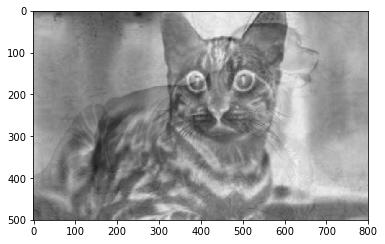

In [17]:
### Ejercicio 6: Aplicación de umbral binario
img_bin = cv2.imread('Imagenes/Lab8/imagen_grises.png')
type(img_bin)
plt.imshow(img_bin)

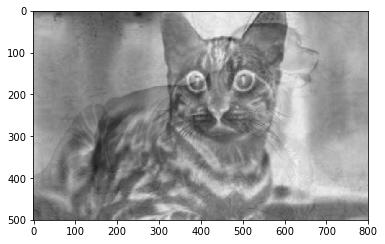

In [19]:
# Aplicar umbral binario
umbral = 127
valor_maximo = 255
ret,imagen_umbral = cv2.threshold(img_bin, umbral, valor_maximo, cv2.THRESH_BINARY)

# Mostrar resultado
plt.imshow(img_bin)

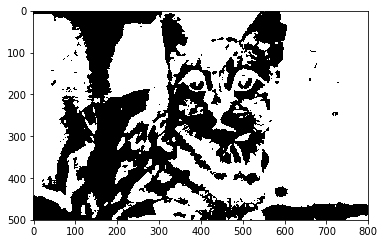

In [20]:
plt.imshow(imagen_umbral)

In [10]:
### Ejercicio 7: Programa de dibujo interactivo con eventos de mouse y teclado
import cv2
import numpy as np

# Imagen en blanco para dibujar
canvas = np.ones((600, 800, 3))

figuras = []  
forma_actual = 'r' 
dibujando = False
punto_inicio = (0, 0)

def dibujar_figuras(img, figuras):
    for fig in figuras:
        tipo, pt1, pt2, color = fig
        if tipo == 'r':
            cv2.rectangle(img, pt1, pt2, color, 2)
        elif tipo == 'c':
            centro = ((pt1[0] + pt2[0]) // 2, (pt1[1] + pt2[1]) // 2)
            radio = int(np.linalg.norm(np.array(pt1) - np.array(pt2)) / 2)
            cv2.circle(img, centro, radio, color, 2)
        elif tipo == 'l':
            cv2.line(img, pt1, pt2, color, 2)

def callback_mouse(event, x, y, flags, param):
    global dibujando, punto_inicio, canvas, forma_actual, figuras

    if event == cv2.EVENT_LBUTTONDOWN:
        dibujando = True
        punto_inicio = (x, y)

    elif event == cv2.EVENT_MOUSEMOVE and dibujando:
        img_temp = canvas.copy()
        dibujar_figuras(img_temp, figuras)
        dibujar_figuras(img_temp, [(forma_actual, punto_inicio, (x, y), (0, 0, 255))])
        cv2.imshow("Dibujo Interactivo", img_temp)

    elif event == cv2.EVENT_LBUTTONUP:
        dibujando = False
        figuras.append((forma_actual, punto_inicio, (x, y), (0, 255, 0)))
        img_temp = canvas.copy()
        dibujar_figuras(img_temp, figuras)
        cv2.imshow("Dibujo Interactivo", img_temp)

# Configurar ventana y mouse
cv2.namedWindow("Dibujo Interactivo")
cv2.setMouseCallback("Dibujo Interactivo", callback_mouse)

# Bucle principal
while True:
    lienzo = canvas.copy()
    dibujar_figuras(lienzo, figuras)
    cv2.imshow("Dibujo Interactivo", lienzo)

    key = cv2.waitKey(10)

    if key == ord('q'):
        break
    elif key == ord('r'):
        forma_actual = 'r'
    elif key == ord('c'):
        forma_actual = 'c'
    elif key == ord('l'):
        forma_actual = 'l'
    elif key == ord('u') and figuras:
        figuras.pop()
    elif key == ord('s'):
        cv2.imwrite("dibujo_guardado.png", lienzo)
        print("Dibujo guardado como 'dibujo_guardado.png'")

cv2.destroyAllWindows()


Dibujo guardado como 'dibujo_guardado.png'
